<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto-" data-toc-modified-id="Descripción-del-proyecto--0">Descripción del proyecto <a id="desc" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Descripción-de-datos-" data-toc-modified-id="Descripción-de-datos--0.1">Descripción de datos <a id="desc_datos" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Dataset-contract-" data-toc-modified-id="Dataset-contract--0.1.1">Dataset contract <a id="contract" rel="nofollow"></a></a></span></li><li><span><a href="#Dataset-personal" data-toc-modified-id="Dataset-personal-0.1.2">Dataset personal<a id="per" rel="nofollow"></a></a></span></li><li><span><a href="#Dataset-internet-" data-toc-modified-id="Dataset-internet--0.1.3">Dataset internet <a id="inter" rel="nofollow"></a></a></span></li><li><span><a href="#Dataset-phone" data-toc-modified-id="Dataset-phone-0.1.4">Dataset phone<a id="phone" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Creación-de-tabla-general-" data-toc-modified-id="Creación-de-tabla-general--0.2">Creación de tabla general <a id="gt" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Tratamiento-de-datos" data-toc-modified-id="Tratamiento-de-datos-0.2.1">Tratamiento de datos<a id="tr1" rel="nofollow"></a></a></span></li></ul></li></ul></li><li><span><a href="#Análisis-exploratorio-" data-toc-modified-id="Análisis-exploratorio--1">Análisis exploratorio <a id="ae" rel="nofollow"></a></a></span></li><li><span><a href="#Modelos-de-machine-learning" data-toc-modified-id="Modelos-de-machine-learning-2">Modelos de machine learning</a></span><ul class="toc-item"><li><span><a href="#Elección-de-carácteristicas" data-toc-modified-id="Elección-de-carácteristicas-2.1">Elección de carácteristicas</a></span></li><li><span><a href="#Modelo-de-árbol-de-decisión" data-toc-modified-id="Modelo-de-árbol-de-decisión-2.2">Modelo de árbol de decisión</a></span></li><li><span><a href="#Modelo-de-bosque-aleatorio" data-toc-modified-id="Modelo-de-bosque-aleatorio-2.3">Modelo de bosque aleatorio</a></span></li><li><span><a href="#Modelo-con-LigthGBM" data-toc-modified-id="Modelo-con-LigthGBM-2.4">Modelo con LigthGBM</a></span></li><li><span><a href="#Modelo-CatboostClassifier" data-toc-modified-id="Modelo-CatboostClassifier-2.5">Modelo CatboostClassifier</a></span></li></ul></li><li><span><a href="#Conclusión-final" data-toc-modified-id="Conclusión-final-3">Conclusión final</a></span></li></ul></div>

# Descripción del proyecto <a id= "desc"></a>

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

**Servicios de Interconnect**

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

## Descripción de datos <a id= "desc_datos"></a>

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

In [103]:
%matplotlib inline

# importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from boruta import BorutaPy



ModuleNotFoundError: No module named 'catboost'

In [ ]:
#adquisición de datos
try:
    df_contract = pd.read_csv('datasets/contract.csv')
    df_internet = pd.read_csv('datasets/internet.csv')
    df_personal = pd.read_csv('datasets/personal.csv')
    df_phone = pd.read_csv('datasets/phone.csv')
except:
    df_contract = pd.read_csv('C:/Users/jfcomb/Documents/final_project/datasets/contract.csv')
    df_internet = pd.read_csv('C:/Users/jfcomb/Documents/final_project/datasets/internet.csv')
    df_personal = pd.read_csv('C:/Users/jfcomb/Documents/final_project/datasets/personal.csv')
    df_phone = pd.read_csv('C:/Users/jfcomb/Documents/final_project/datasets/phone.csv')

### Dataset contract <a id ="contract"></a>

In [104]:
#Verificación de datos duplicados
print("Dimensión de datos:", df_contract.shape)
print("Datos duplicados:", df_contract.duplicated().sum(), "\n")

#Resumen del dataframe
df_contract.info()
print()
#visualización de datos
df_contract.head(10)

Dimensión de datos: (7043, 8)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [105]:
#visualización de estadísticas
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [106]:
# Valores unicos
print('Modalidades de pago:', df_contract.Type.unique())  # tipo de contrato
print()
print('Métodos de pago:', df_contract.PaymentMethod.unique())  # tipo de método de pago

Modalidades de pago: ['Month-to-month' 'One year' 'Two year']

Métodos de pago: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Esta tabla contiene la información de 7043 usuarios con 8 columnas en donde presentan el inicio el contrato con la empresa de algún servicio, si aún cuentan con el servicio, los cargos mensuales, el tipo de contrato, el método de pago.
 Una información que podría no ser relevante es si su estado de cuenta se envía digital o físico.
Existen algunas columnas con el tipo de datos incorrectos: `BeginDate` y `TotalCharges`, la columna `EndDate` nos indica si aún tiene vigente el servicio cambiaremos sus valores a 1 y 0, donde 1 indicará que tiene el servicio y False que ya no.

En las columnas `Type` contamos con 3 modalidades de pago y en la columna `PaymentMethod` hay 4 métodos de pagos que se pueden usar.

En las estadísticas solo observamos los cargos mensuales, teniendo que va del rango de \\$18.25 a \\$118.75

In [107]:
# visualización de estadísticas
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Nuevamente al ver las características ya podemos observar las columnas `BeginDate` y `TotalCharges`, donde vemos que los datos van desde el 2013 al primero de febrero de 2020 y un máximo de cargos de $8684.80

### Dataset personal<a id = 'per'></a>

In [108]:
# Dimensión de tabla
print("Dimensión de datos:", df_personal.shape)
# Verificación de datos duplicados
print("Datos duplicados:", df_personal.duplicated().sum(), "\n")

# Resumen del dataframe
df_personal.info()
print()
# visualización de datos
df_personal.head(10)

Dimensión de datos: (7043, 5)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Este dataset cuenta con la misma cantidad de datos que con el dataset de contract con únicamente 5 columnas, aqui nos proporciona datos del sexo del cliente, no tenemos valores nulos

### Dataset internet <a id='inter'></a>

In [109]:
# Dimensión de tabla
print("Dimensión de datos:", df_internet.shape)

# Verificación de datos duplicados
print("Datos duplicados:", df_internet.duplicated().sum(), "\n")

# Resumen del dataframe
df_internet.info()
print()

# visualización de datos
df_internet.head(10)

Dimensión de datos: (5517, 8)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Este conjunto de datos cuenta con 5517 datos y 8 columnas, donde se describe que tipo de servicio de internet tiene y que otros servicios tienen contratados, no existen valores nulos y los tipos de datos son correctos.

### Dataset phone<a id= 'phone'></a> 

In [110]:
# Dimensión de tabla
print("Dimensión de datos:", df_phone.shape)
# Verificación de datos duplicados
print("Datos duplicados:", df_phone.duplicated().sum(), "\n")

# Resúmen del dataframe
df_phone.info()
print()

# visualización de datos
df_phone.head(10)

Dimensión de datos: (6361, 2)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


En este dataframe solo tenemos 6361 datos y 2 columnas, el ID del cliente y si cuenta con multiples líneas

## Creación de tabla general <a id = 'gt'></a>

A continuación se uniran las tablas para formar una con toda la información, existiran ciertas columnas con valores nulos por que no se tiene la información de todos los usuarios en algunas tablas

In [111]:
# Unión de tablas
df = df_contract.copy()
for data in [df_personal, df_internet, df_phone]:
    df = df.merge(data, how='left', on='customerID')

#Dimensión del data
print('Dimensión de la tabla:', df.shape)
# Visualización de nuevo data
df.head()

Dimensión de la tabla: (7043, 20)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [112]:
#Cantidad de valores nulos
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

### Tratamiento de datos<a id= 'tr1'></a>

Como se vió con anterioridad en la parte de descripción de datos algunos de los valores problematicos de acuerdo a cada dataset son:

1. **`df_contract`**: Nuestra columna `TotalCharges` existen datos sin valor (" "),localizados en los registros de clientes más reciente *"2020-02-01"*,porlo que aún no ha pasado su primera fecha de corte, estos valores serán sustituidos por la cantidad de 0.

    * Cambio de tipo de datos de la columnas `BeginDate` y `TotalCharges` a datetime y float respectivamente.
    * Columna`EndDate` haremos una nueva columna en donde sus valores seran 1 y 0, donde '1' indicará que ha cancelado el servicio y '0' que aún continua con el, haremos otra columna en donde cambiareos el tipo a datatime para poder manejarlo en un analisis de cohort
  
2. **`df_personal`**, **`df_internet`**, **`df_phone`**: Estos datasets contienen columnas con el string 'Yes' y 'No' las cuales cambiaremos por 1's y 0's respectivamente. Antes de hacer este procesamiento trataremos de resolver  los valores nulos que nos quedan al fusionar las tablas en las pertenecientes de internet y phone.

In [113]:
# Visualización de espacio en blanco
df[df['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


In [114]:
# Cambio de tipo de BeginDate a datetime
df['BeginDate'] = df.BeginDate.astype('datetime64[ns]')

# Cambio de tipo de datos de la columna TotalCharges
df['TotalCharges'] = df.TotalCharges.replace(' ', '0').astype('float')

# Verificación de cambios realizados
print('BeginDate: {}\nTotalCharges: {}'.format(df['BeginDate'].dtypes,
                                               df['TotalCharges'].dtypes
                                              )
    )

BeginDate: datetime64[ns]
TotalCharges: float64


Se creará una lista con las columnas que tiene valores ausentes, después se creará una tabla agrupada por los precios donde se obtendran las modas de cada servicio de acuerdo al precio, posteriormente se hará una función con la que se llenaran los valores nulos con la información de la tabla obtenida.
Asi intentaremos llenar los valores nulos tomando en cuenta si ya hay información en ese precio.

In [115]:
# Obtención de los nombre de las columnas en dataset internet con valores vacios
missing_values_columns = df_internet.drop('customerID', axis=1).columns.to_list()
# Agregamos la columna con valores nulos del dataset phone
missing_values_columns.append('MultipleLines')

In [116]:
# Creación de tabla para relleno de valores nulos
df_mode = (df.groupby('MonthlyCharges')[missing_values_columns]
           .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
           .reset_index()
          )

# Visualización de la tabla
df_mode.head()

,MonthlyCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,18.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,18.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,18.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,18.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,18.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [117]:
# Creación de función
def fill_values(df, data, column):
    column_1 = df['MonthlyCharges']
    if pd.isna(df[column]):
        return data.loc[(data['MonthlyCharges'] == column_1), column].values[0]
    else:
        return df[column]

In [118]:
# Aplicación de función
for element in missing_values_columns:
    df[element] = df.apply(fill_values, args=(df_mode, element), axis=1)

In [119]:
# Valores nulos presentes
df[missing_values_columns].isna().sum()

InternetService     1302
OnlineSecurity      1302
OnlineBackup        1302
DeviceProtection    1302
TechSupport         1302
StreamingTV         1302
StreamingMovies     1302
MultipleLines        332
dtype: int64

No todos los valores nulos se han podido rellenar con este primer paso debido a que existen algunos valores en los cargos mensuales que son únicos y contiene valores nulos en ese campo. 

Analicemos los valores mínimos y máximos de los precios por tipo de servicio de internet. Esto nos dará un rango de corte en donde podemos reemplazar valores en dichas columnas.



In [120]:
#mínimos y máximos de tipo de servicio de internet
df.groupby('InternetService')['MonthlyCharges'].agg(['min', 'max'])

,min,max
InternetService,,
DSL,23.45,94.80
Fiber optic,67.75,118.75


In [121]:
#Visualización de valores con los cargos min y max por tipo de servicio
df.query(
    "InternetService == 'DSL' and MonthlyCharges == 23.45 or \
    InternetService == 'DSL' and MonthlyCharges == 94.80 or \
    InternetService == 'Fiber optic' and MonthlyCharges == 67.75 or \
    InternetService == 'Fiber optic' and MonthlyCharges == 118.75"
).sort_values(by = 'InternetService')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3432,8174-TBVCF,2014-04-01,No,Two year,Yes,Credit card (automatic),94.80,6859.05,Female,0,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6074,3797-VTIDR,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,23.45,23.45,Male,0,Yes,No,DSL,No,No,No,No,No,No,NaN
4556,3750-CKVKH,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,67.75,116.65,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
4586,7569-NMZYQ,2014-02-01,No,Two year,Yes,Bank transfer (automatic),118.75,8672.45,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes


El precio mínimo de la fibra óptica es de \\$67.75, este es el precio sin contar con algún servicio extra, esto nos indica que todo lo debajo de el se puede catalogar como servicio DSL. También podemos inferir que debajo de 23.45 no tendrá ninguna clase de servicio adicional.

In [122]:
# Función para relleno de valores

def InternetService_fill(data):
    
    column = data['InternetService']
    charge = data['MonthlyCharges']
    
    if pd.isna(column):
        if charge < 67.75:
            return 'DSL'
        else:
            return column
    else:
        return column


In [123]:
# Relleno de valores
df['InternetService'] = df.apply(InternetService_fill, axis=1 )

Realizando exploración ordenando por pago mensual y utiliando el servicio de DSL se pudo encontar un patron en el cual debajo de los \\$26.90 no se tiene contratado ningun servicio. Otra obsrvación importante es que los valores nulos faltantes están presentes solo en la las filas en donde el servicio de internet es DSL.

Otra exploración realizada fue observando los rangos en el que los clientes tienen el servicio por debajo \\$42.90 tienen lineas multiples y por arriba no.Cabe recalcar que estos datos son obtenidos mediante una inspección visual de la tabla.

In [124]:
# Valores nulos en filas donde el servicio sea por fibra óptica
df[df['InternetService'] == 'Fiber optic'][missing_values_columns].isna().sum()

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [125]:
# Imputación de valores nulos
df[df['MonthlyCharges'] <= 26.90] = df.query("MonthlyCharges <=26.90").fillna('No')
df[df['MonthlyCharges'] < 42.90] =  df.query("MonthlyCharges < 42.90").fillna('Yes')
df[df['MonthlyCharges'] > 42.90] =  df.query("MonthlyCharges >= 42.90").fillna('No')

#Verificación de valores nulos restantes
df[missing_values_columns].isna().sum()

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

Ahora que ya no tenemos valores nulos procedemos a cambiar tipos de datos de nuestras columnas empezaremos trarando la columna de `EndDate` creando la columna `Exited` donde se pondra si el cliente aún está activo o ya no,
Crearemos otra columna llamada `ExitedDate` donde guardaremos las fechas de las personas que ya cancelaron, posteriormente cambiaremos los valores de *'Yes'* y *No* por 1's y 0's de nuestro dataset

In [126]:
# Cambio  a valores boleanos
df['Exited']=df['EndDate'].transform(lambda x: 0 if x=='No' else  1)
# Columna con fecha de terminación de contrato
df['ExitedDate'] = df['EndDate'].transform(lambda x:np.nan if x=='No' else  x).astype('datetime64[ns]')
# Visualización de cambio
df[['Exited','ExitedDate']].head(5)

,Exited,ExitedDate
0,0,NaT
1,0,NaT
2,1,2019-12-01
3,0,NaT
4,1,2019-11-01


In [127]:
# Diccionario ocn valroes a cambiar
values_dict = {'Yes': 1,
        'No': 0
        }

# Realización de cambio
df = df.replace(values_dict)

# Visualización de tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   int64         
 11  Dependents        7043 non-null   int64         
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   int64         
 14  OnlineBackup      7043 n

Agruegaremos dos columnas más en donde tengamos el año de inicio y el año de cancelación

In [128]:
#Extracción de años
df['BeginYear'] = df.BeginDate.dt.year
df['EndYear'] = df.ExitedDate.dt.year

Ahora tenemos una tabla sin valores nulos y con los tipos de datos correctos, además se agruegaron dos columnas adicionales, terminando con una tabla de 7043 datos con 24 columnas

In [129]:
df.describe()

,BeginDate,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Exited,ExitedDate,BeginYear,EndYear
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1869,7043.000000,1869.000000
mean,2017-04-30 13:01:50.918642688,0.592219,64.761692,2279.734304,0.162147,0.483033,0.299588,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.477069,0.265370,2019-11-15 21:31:18.009630976,2016.878603,2019.246121
min,2013-10-01 00:00:00,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-10-01 00:00:00,2013.000000,2019.000000
25%,2015-06-01 00:00:00,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-11-01 00:00:00,2015.000000,2019.000000
50%,2017-09-01 00:00:00,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-11-01 00:00:00,2017.000000,2019.000000
75%,2019-04-01 00:00:00,1.000000,89.850000,3786.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019-12-01 00:00:00,2019.000000,2019.000000
max,2020-02-01 00:00:00,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020-01-01 00:00:00,2020.000000,2020.000000
std,NaN,0.491457,30.090047,2266.794470,0.368612,0.499748,0.458110,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.499509,0.441561,NaN,1.970573,0.430865


# Análisis exploratorio <a id = 'ae'></a>

En esta sección presentaremos las siguientes gráficas

* Balanceo en los datos en la variable objetivo
* Cantidad de inscripciones y cancelaciones por año
* La tasa de cancelación a través del tiempo

In [130]:
# Verificación de balanceo de variable objetivo
px.bar(df,
       x=['Activo','Cancelado'],
       y=df['Exited'].value_counts().values,
       labels = {'y': 'Count',
                'x' : 'Exited clients'},
       text_auto = True,
       width=700, height=450,
       title = 'Gráfica de clientes activos y cancelados'
      )



Como se puede apreciar en la gráfica anterior, tenemos muchas inscripciones activas que canceladas

En la siguiente gráfica visualizaremos la tasa de cancelación por año desde su registro, con estro podemos visualizar en que años se han tenido problemas, para ellos vamos a crear una nueva tabla donde tomaremos los datos de la columna `customerID`, `BeginYear`, `EndYear` y `Exited`.

In [131]:
# Creación de una nueva tabla 
df_retain = df[['customerID','BeginYear','EndYear','Exited']].copy()
df_retain['EndYear'] = df_retain['EndYear'].fillna(df_retain['BeginYear'])
# Visualización de la tabla
df_retain.head()

,customerID,BeginYear,EndYear,Exited
0,7590-VHVEG,2020,2020.0,0
1,5575-GNVDE,2017,2017.0,0
2,3668-QPYBK,2019,2019.0,1
3,7795-CFOCW,2016,2016.0,0
4,9237-HQITU,2019,2019.0,1


Crearemos dos tablas una nueva donde colocaremos el número de clientes registrados por año y otra en donde obtengamos el número de clientes que cancelan el servicio.

In [132]:
# Tabla con cantidad de clientes por año
customer_size_df= df_retain.groupby('BeginYear').customerID.nunique().reset_index()
customer_size_df.rename(columns = {'customerID':'customerSize'}, inplace = True)

# Tabla con cantidad de cancelaciones por año
custumer_exited_df= df_retain.groupby('EndYear').Exited.sum().reset_index()

# Union de tablas
custumer_exited_df = customer_size_df.merge(custumer_exited_df,how = 'left', left_on='BeginYear', right_on='EndYear').drop('EndYear', axis = 1)

# Relleno de valores nulos
custumer_exited_df.fillna(0, inplace = True)

# Visualización de datos
custumer_exited_df

,BeginYear,customerSize,Exited
0,2013,8,0.0
1,2014,1344,0.0
2,2015,852,0.0
3,2016,763,0.0
4,2017,845,0.0
5,2018,1030,0.0
6,2019,1957,1409.0
7,2020,244,460.0


Graficaremos la tabla anterior para obtener una representación visual de esta y ver el comportamiento

In [133]:
#Gráfico de cantidad de nuevos usuarios y usuarios con cancelaciones.

fig = go.Figure()
fig.add_trace(go.Scatter(x=custumer_exited_df['BeginYear'], y=custumer_exited_df['customerSize'],
                         mode='lines+markers+text',
                         name='Clientes nuevos',
                         text=custumer_exited_df['customerSize']
                        )
             )

fig.add_trace(go.Scatter(x=custumer_exited_df['BeginYear'], y=custumer_exited_df['Exited'],
                         mode='lines+markers+text',
                         name='Cancelaciones',
                         text=custumer_exited_df['Exited']
                        )
             )

fig.update_layout(title={'text': "Cantida de clientes nuevos y cancelaciones por año",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'
                        },
                  xaxis_title = 'Años',
                  yaxis_title = 'Cantidad',
                  width = 850, height=500)

fig.update_traces(textposition='top center')

En esta tabla podemos observar que el año con más ingresos de usuarios fue en el año de 2019, se aprecia como del 2014 al 2016 se presenta un descenso de inscripcones y a partir de alli empieza a aumentar, para el año 2020 no podemos asegurar que ha dismiuido la cantidad puesto que la información llega hasta febrero. 

Podemos notar como se había mantenido sin bajas hasta el año 2019 en donde se dió un repunte muy alto.

Calcularemos la retención por años contando la cantidad de usuarios de la diferencia entre el final y el inicio del contrato, aquí estará topado hasta el 2020 por que es el año máximo de nuestro dataset. Para ello crearemos una nueva tabla para guardar dichos valores y uniremos de la tabla **custumer_exited_df** la columna de `customerSize`

In [134]:
# Cálculo del tiempo de vida de contratos de los clientes
df_retain['CohortLifetime']=df_retain['EndYear']-df_retain['BeginYear']

# Creación de nueva tabla con la cuenta de usuarios unicos
cohorts = df_retain.pivot_table(index = ['BeginYear','CohortLifetime'], 
                         aggfunc = {'customerID':'nunique'}).reset_index() 

# Tabla agrupada por año de inicio del cliente y por años en el servicio
cohorts=cohorts.pivot_table(index='BeginYear', columns='CohortLifetime', values = 'customerID').reset_index()
# Agregamos el valor inicial de los clientes
cohorts[0] = customer_size_df['customerSize']

# Visualización
cohorts


CohortLifetime,BeginYear,0.0,1.0,2.0,3.0,4.0,5.0,6.0
0,2013,8,NaN,NaN,NaN,NaN,NaN,8.0
1,2014,1344,NaN,NaN,NaN,NaN,70.0,28.0
2,2015,852,NaN,NaN,NaN,100.0,23.0,NaN
3,2016,763,NaN,NaN,111.0,34.0,NaN,NaN
4,2017,845,NaN,153.0,46.0,NaN,NaN,NaN
5,2018,1030,242.0,73.0,NaN,NaN,NaN,NaN
6,2019,1957,256.0,NaN,NaN,NaN,NaN,NaN
7,2020,244,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# Calculo de porcentaje de cancelaciones
for i in range (0,8):
    for j in range(1,7):
        cohorts.loc[i,j] = cohorts.loc[i,j]/cohorts.loc[i,0]
        
# Visualización de datos
cohorts[0] = cohorts[0]/cohorts[0]

# Cambio de índice
cohorts=cohorts.set_index('BeginYear')
# Visualización de datos
cohorts

CohortLifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0
BeginYear,,,,,,,
2013,1.0,NaN,NaN,NaN,NaN,NaN,1.000000
2014,1.0,NaN,NaN,NaN,NaN,0.052083,0.020833
2015,1.0,NaN,NaN,NaN,0.117371,0.026995,NaN
2016,1.0,NaN,NaN,0.145478,0.044561,NaN,NaN
2017,1.0,NaN,0.181065,0.054438,NaN,NaN,NaN
2018,1.0,0.234951,0.070874,NaN,NaN,NaN,NaN
2019,1.0,0.130812,NaN,NaN,NaN,NaN,NaN
2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN


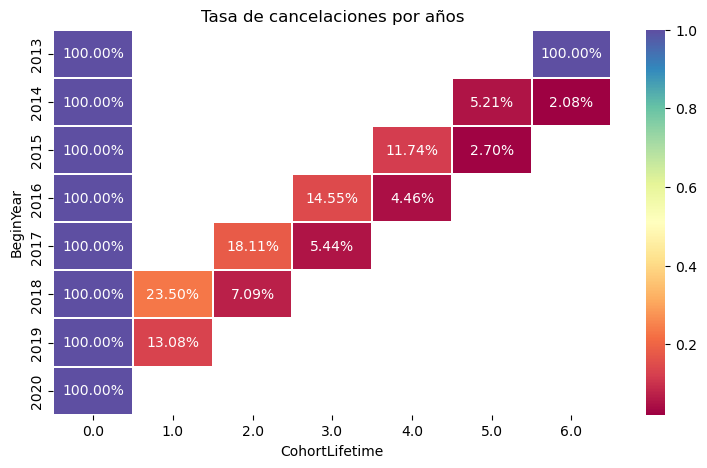

In [136]:
# Gráfica de cancelaciones por año
plt.figure(figsize=(9, 5))
plt.title('Tasa de cancelaciones por años')
sns.heatmap(cohorts, 
            annot=True, 
            fmt='.2%', 
            linewidths= .1,
            linecolor='white',
            cmap='Spectral'); 

Podemos ver que ya no existe ningún cliente de los inscritos en el año 2013, los clientes pertenecientes al 2014 tuvieron pocas tasas de cancelaciones.

En el año 2018 para el primer año casí una cuarta parte de los clientes inscritos canceló. Finalmente lo clientes del 2019 en un periodo de un año hubo una cantidad de cancelación de más del 10%. se observa que el aumento de cancelaciones se da en menos tiempo que en años anteriores.

# Modelos de machine learning

## Elección de carácteristicas 

Empecemos por descartar como primer paso caracteristicas no sean relevantes para el modelado como son las columnas de  `customerID` y `PaperlessBilling` y nuestras columnas de fechas, ya que estamos tratando el problema a través de las características y no del tiempo.
    
Posterioremente aplicaremos el método de "Boruta" para verificar si el resto de las caracteristicas son necesarias. Antes de realizar este paso realizaremos una codificación de los datos categóricos y la división en conjunto de prueba y entrenamiento.


In [137]:
# Eliminación de características
df_model = df.drop(['customerID', 'PaperlessBilling', 'BeginDate', 'EndDate', 'BeginYear', 'EndYear','ExitedDate'],axis=1).copy()

# Visualización
df_model.head()

,Type,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Exited
0,Month-to-month,Electronic check,29.85,29.85,Female,0,1,0,DSL,0,1,0,0,0,0,1,0
1,One year,Mailed check,56.95,1889.50,Male,0,0,0,DSL,1,0,1,0,0,0,0,0
2,Month-to-month,Mailed check,53.85,108.15,Male,0,0,0,DSL,1,1,0,0,0,0,0,1
3,One year,Bank transfer (automatic),42.30,1840.75,Male,0,0,0,DSL,1,0,1,1,0,0,1,0
4,Month-to-month,Electronic check,70.70,151.65,Female,0,0,0,Fiber optic,0,0,0,0,0,0,0,1


Tenemos 4 columnas con características categóricas las cuales serán transformadodas con el método de ordinalencoder. Tambíen podemos notar que las columnas de cargos van a tener valores más grandes que respecto a las demás características por lo que las estandarizaremos. Finalmente dividiremos nuestros datos en un conjunto de entrenamiento y prueba

In [189]:
# Realización de codificación de variables categóricas
encoder = OrdinalEncoder()
df_model = pd.DataFrame(encoder.fit_transform(df_model), columns=df_model.columns)

# División en características y objetivos
features = df_model.drop('Exited', axis=1)
target = df_model['Exited']

# Estandarización de datos
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Visualización de datos 
features.head()

,Type,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,0.0,2.0,142.0,75.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,498.0,3625.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3.0,436.0,537.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,266.0,3571.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,2.0,729.0,675.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
# División en conjunto de entrenamiento y prueba
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=.25, stratify=target, random_state=42)

print('Tamaño de caracteristicas conjunto de entrenamiento', f_train.shape)
print('Tamaño de caracteristicas conjunto de entrenamiento', f_test.shape)

Tamaño de caracteristicas conjunto de entrenamiento (5282, 16)
Tamaño de caracteristicas conjunto de entrenamiento (1761, 16)


A continuación utilizando el métdo de boruta seleccionaremos las caracteristicas relevante para nuestro modelado, utilizando el modelo de RandomForest

In [191]:
%%time
#Creación de objeto con randomfores
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=5)

# Creación de la instancia
boruta_selector = BorutaPy(clf, n_estimators='auto', random_state=42, verbose=0)
# Entrenamiento
boruta_selector.fit(f_train.values, t_train.values.ravel())

# Observación de caracteristicas finales
print('Caracteristicas aceptadas:',f_train.columns[boruta_selector.support_].to_list())

Caracteristicas aceptadas: ['Type', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport']
CPU times: total: 57 s
Wall time: 16.9 s


Observamos que con el método hemos descartado 7 de las 15 características que teníamos, las características relacionadas con información de clientes como el género, si tiene pareja, así como, algunos servicios no tuvieron relevancia.

Ahora vamos a quedarnos unicamente con las características aceptadas  para empear con el modelado 

In [192]:
# caracteristicas importantes en el conjunto de entrenamiento
f_train_selection = boruta_selector.transform(f_train.values)

# caracteristicas importantes en el conjunto de entrenamiento
f_test_selection = boruta_selector.transform(f_test.values)

Por último haremos una función para una rutina de evaluación

In [193]:
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]


        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)


    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## Modelo de árbol de decisión

In [194]:
%%time
#Creación del modelo
param_grid = {'criterion':['gini', 'entropy'] ,
              'splitter':['best', 'random'],
              'max_depth':[10, 15,20],
              'min_samples_split':[3,5],
              'min_samples_leaf':[1,3,6],
              'max_features':['sqrt', 'log2'],
              'class_weight':['balanced', None],
              'random_state':[1235]
             }

model_1 = GridSearchCV(DecisionTreeClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=5
                       )

# Entrenamiento
model_1.fit(f_train_selection,t_train)
model_1 = model_1.best_estimator_
model_1

CPU times: total: 11.9 s
Wall time: 11.9 s


DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=6,
                       min_samples_split=3, random_state=1235,
                       splitter='random')

          train  test
Accuracy   0.80  0.79
F1         0.60  0.57
APS        0.61  0.56
ROC AUC    0.85  0.81


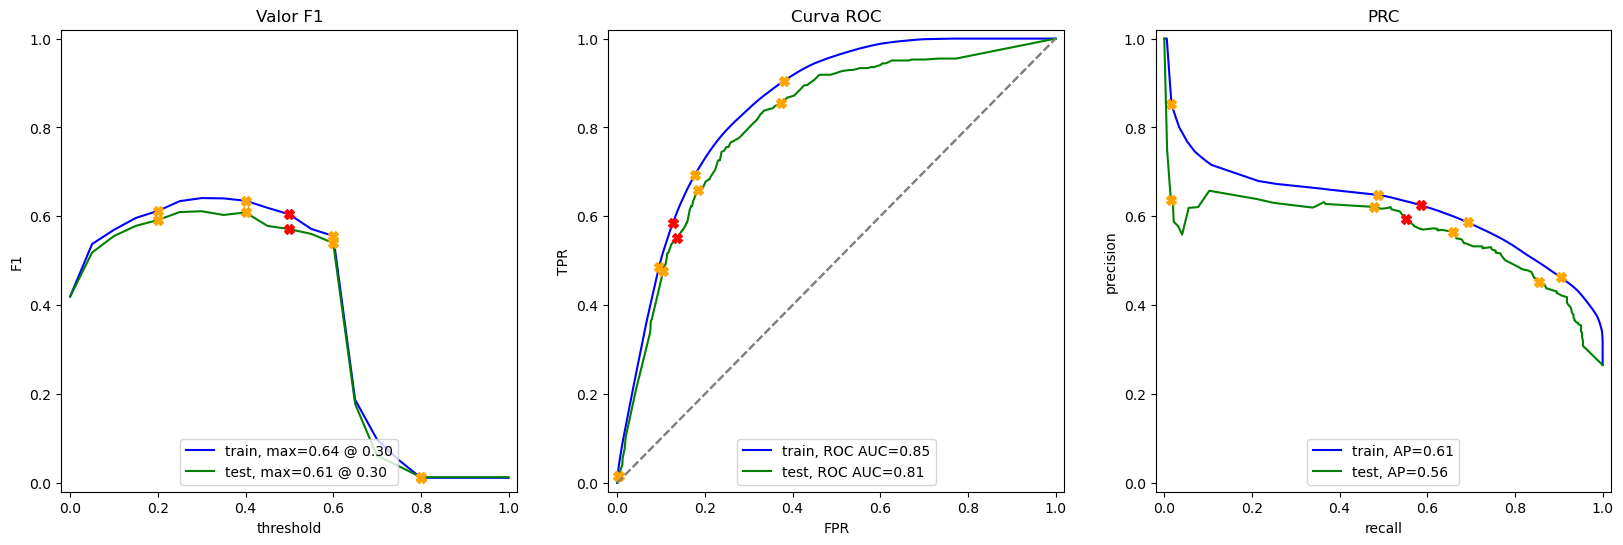

In [195]:
# Evaluación del modelo
evaluate_model(model_1, f_train_selection, t_train, f_test_selection, t_test)

## Modelo de bosque aleatorio

In [196]:
%%time
#Creación del modelo
param_grid = {'n_estimators': [100,150],
              'criterion':['gini', 'entropy'],
              'max_depth': [10, 15,None],
              'min_samples_leaf': [3,12],
              'max_features':['sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'n_jobs': [-1],
              'random_state' : [12345]
             }

model_2 = GridSearchCV(RandomForestClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=3
                       )

# Entrenamiento
model_2.fit(f_train_selection,t_train)
model_2 = model_2.best_estimator_
model_2

CPU times: total: 1min 8s
Wall time: 1min 11s


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=12,
                       n_estimators=150, n_jobs=-1, random_state=12345)

          train  test
Accuracy   0.82  0.80
F1         0.62  0.55
APS        0.74  0.65
ROC AUC    0.89  0.84


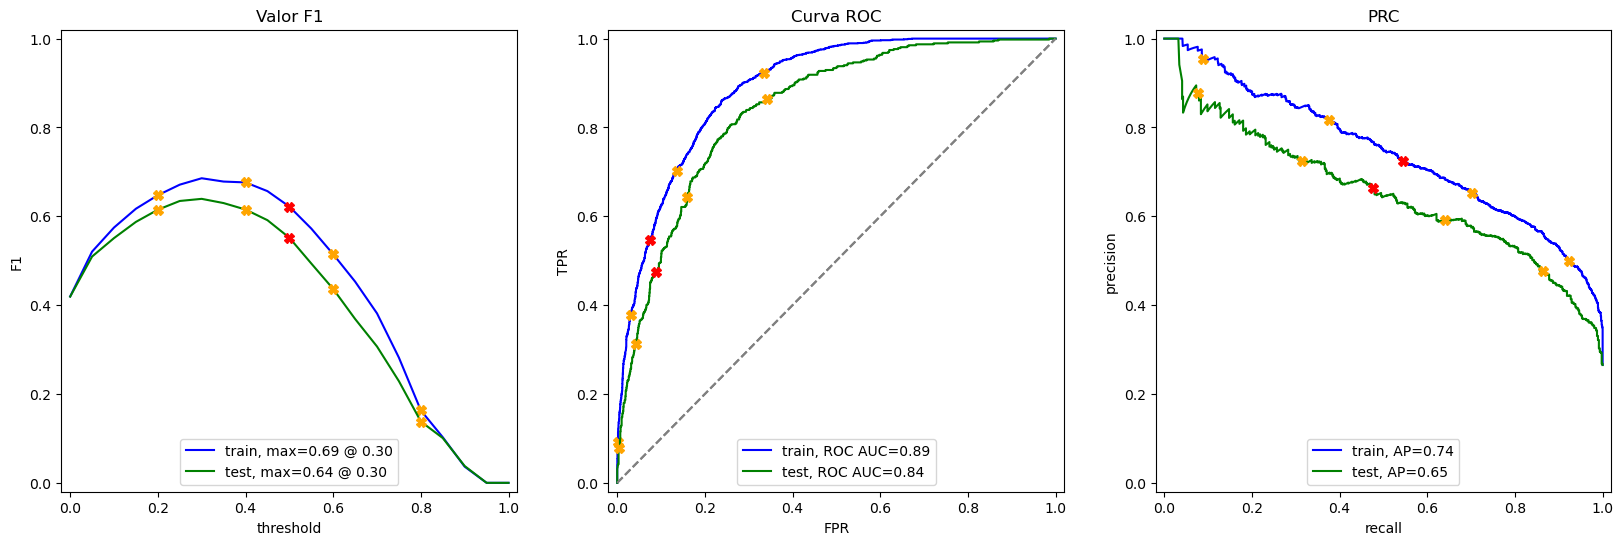

In [197]:
# Evaluación del modelo
evaluate_model(model_2, f_train_selection, t_train, f_test_selection, t_test)

## Modelo con LigthGBM

In [198]:
%%time
# Creación del modelo
param_grid = {'learning_rate': [.01,.05],
              'boosting_type': ['gbdt','goss'],
              'objective': ['binary'],
              'num_leaves': [32,64],
              'max_depth': [15,20],
              'n_estimators': [50,100],
              'class_weight': ['balanced', None],
              'n_jobs': [-1],
              'random_state' : [12345],
              'verbose': [-1]
             }

model_3 = GridSearchCV(LGBMClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=3
                       )

# Entrenamiento
model_3.fit(f_train_selection,t_train)
model_3 = model_3.best_estimator_
model_3


CPU times: total: 1min 38s
Wall time: 12.7 s


LGBMClassifier(boosting_type='goss', class_weight='balanced',
               learning_rate=0.05, max_depth=20, n_estimators=50, n_jobs=-1,
               num_leaves=32, objective='binary', random_state=12345,
               verbose=-1)

          train  test
Accuracy   0.77  0.75
F1         0.67  0.63
APS        0.73  0.65
ROC AUC    0.88  0.84


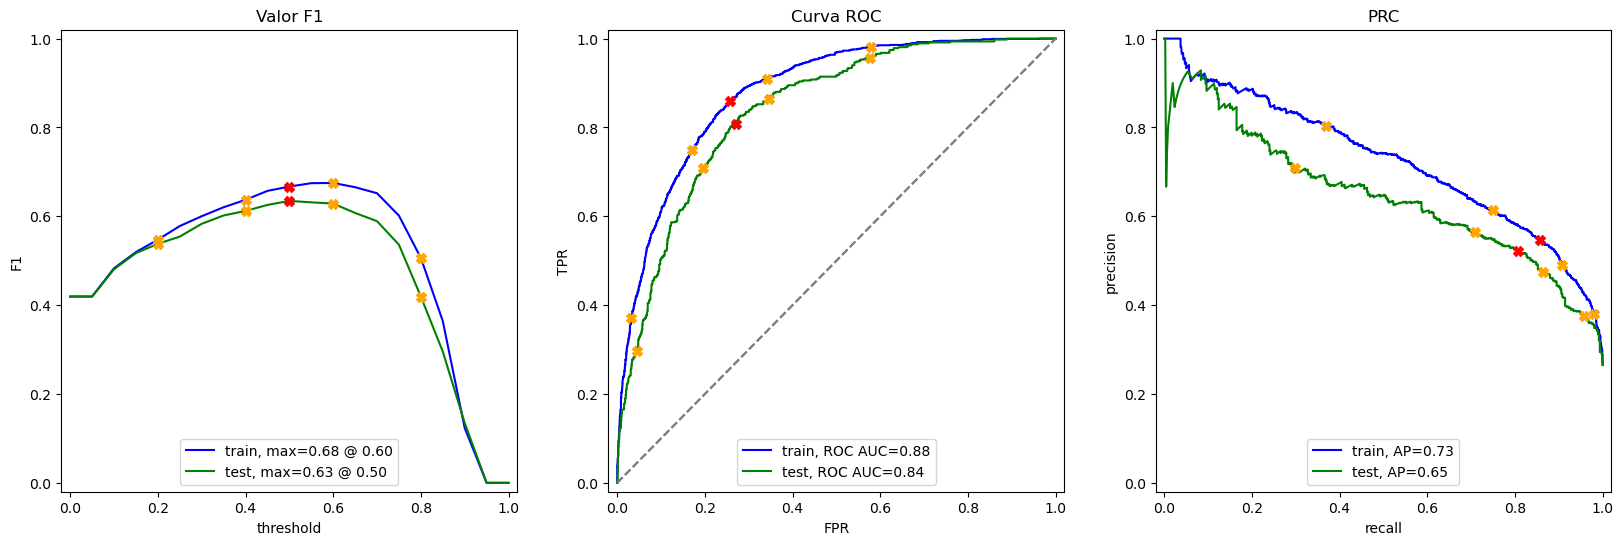

In [199]:
# Evaluación del modelo
evaluate_model(model_3, f_train_selection, t_train, f_test_selection, t_test)

## Modelo CatboostClassifier

In [200]:
%%time
# Creación del modelo
param_grid = {'iterations': [50,100],
              'learning_rate': [.01,0.05],
              'loss_function': ['logloss','f1'],
              'max_depth': [10,15],
              'n_estimators': [50,100], 
              'num_leaves': [32,64],                                      
              'n_jobs': [-1],
              'random_state' : [12345],
              'verbose': [-1]
             }

model_4 = GridSearchCV(LGBMClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=3
                       )

# Entrenamiento
model_4.fit(f_train_selection,t_train)
model_4 = model_4.best_estimator_
model_4

CPU times: total: 1min 33s
Wall time: 12.9 s


LGBMClassifier(iterations=50, learning_rate=0.05, loss_function='logloss',
               max_depth=10, n_estimators=50, n_jobs=-1, num_leaves=32,
               random_state=12345, verbose=-1)

          train  test
Accuracy   0.83  0.79
F1         0.62  0.53
APS        0.74  0.65
ROC AUC    0.88  0.84


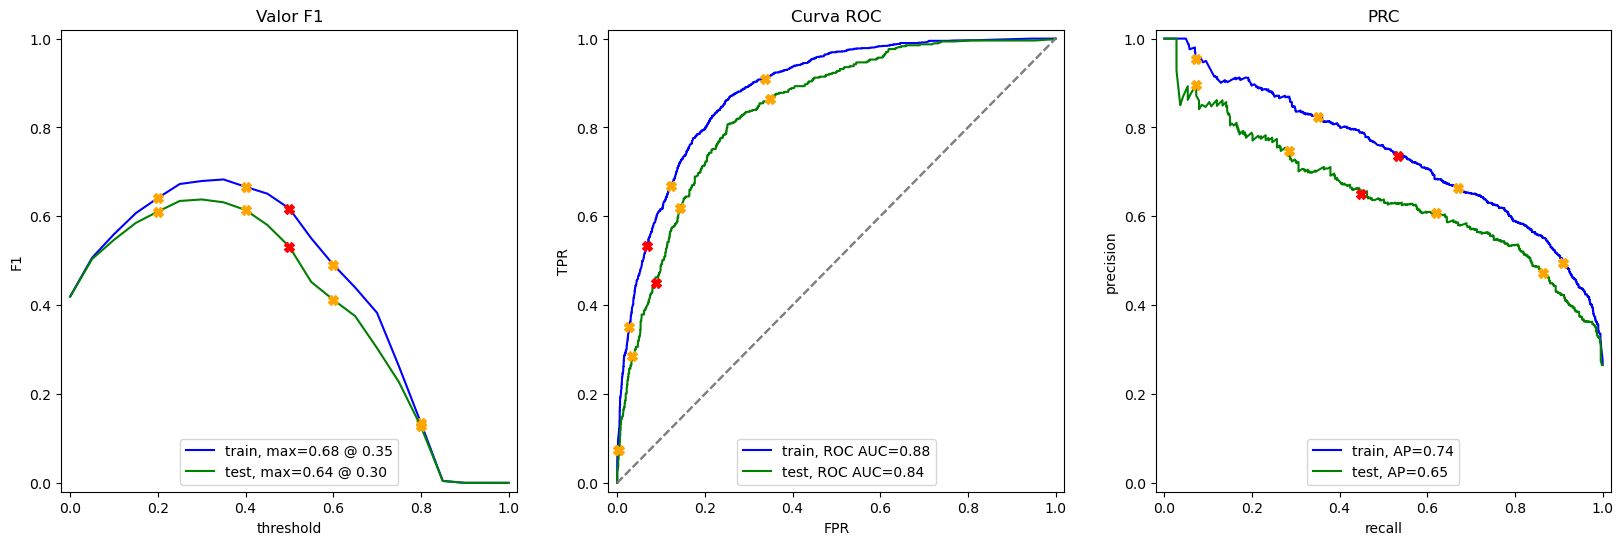

In [201]:
# Evaluación del modelo
evaluate_model(model_4, f_train_selection, t_train, f_test_selection, t_test)

# Conclusión final

Se contaba con 4 datasets en donde contenía información de los clientes, que servicios tenía contratado, sus cargos mensuales, cargos totales, método de pago entre otros. Se unieron todas las tablas para contener todas esas informaciones en una sola, algunas tablas no contaban con todos los ID de los clientes, esto nos generó valores nulos en ciertas columnas las cuales fueron tratadas con diversas estrategias. Algunos columnas no tenian el tipo correcto por lo cual se corrigieron. Para mayor facilidad en las columnas que contaban con palabras de Yes y No se cambiaron por 1's y 0's. Tambíen se crearon algunas columnas como la de `Exited` en donde clasificamos que clientes contiuaban y cuales no.

En la parte de exploración realizamos algunos gráficos en donde pudimos observar que nuestra columna objetivo esta desbalanceada, contabamos con más clientes que aún contrataban el servicio respecto a los que no. Pudimos visualizar la cantidad de suscripciones anuales, en donde notamos como del año 2014 al 2016 hubo un descenso, pero recuperandose en los años posteriores. También pudimos notar que la mayoría de las cancelaciones eran en el año 2019, antes de ese año no se tiene registro de alguna cancelación.

Finalmente construimos 4 modelos de machine learning, previamente realizamos una elección de características aplicando el método de boruta, en donde obtuvimos como resultado que las características relacionadas con información de clientes como el género, si tiene pareja, así como, algunos servicios no tuvieron relevancia.

Como resultados de nuestros modelos obtuvimos 3 que coincidieron en la metrica de ROC-AUC(*Random Fores, LigthGBM Clasiffier y CatboostClassifier*), aunque en terminos generales comparada con otras métricas se consideraria el modelo de LigthGBM Clasiffier ya que nos entregó una mejor evaluación de nuestro "F1"

<div class="alert alert-block alert-success">
<b>Plan de trabajo</b> <a class=“tocSkip”></a>
</div>
<!-- ||Actividad| Descripción|
|-------|:--------:|:-------:|
|**1**|Exploración de datos|Visualización de datos|
|**2**|Limpieza de datos|Eliminar números duplicados, tratar valores nulos y tipo de datos correctos| 
|**3**|Análisis exploratorio| Gráfica de comportamientos y verificación de patrones entre datos|
|**4**|Creación de modelos| Pruebas con distintos modelos e hiperparámetros|
|**5**|Envío para revisión y realización de correciones|  Presentación de resultados y correciones cuantas veces sean necesarias|
|**6**|Entrega Final| Entrega de resultados -->

<table>
    <tr>
        <th></th>
        <th>Actividad</th>
        <th>Descripción</th>
    </tr>
    <tr>
        <th>1</th>
        <td>Exploración de datos y Limpieza de datos</td>
        <td>>Visualización de datos, exploración de características. Eliminar números duplicados, tratar valores nulos y tipo de datos correctos</td>
    </tr>
    <tr>
        <th>2</th>
        <td>Análisis exploratorio</td>
        <td>Gráfica de comportamientos y verificación de patrones entre datos</td>
    </tr>
        <tr>
        <th>3</th>
        <td>Creación de modelo</td>
        <td>Pruebas con distintos modelos e hiperparámetros</td>
    </tr>
        <tr>
        <th>4</th>
        <td>Envío para revisión y realización de correciones</td>
        <td>Presentación de resultados y correciones cuantas veces sean necesarias</td>
    </tr>
    </tr>
        <tr>
        <th>5</th>
        <td>Entrega Final</td>
        <td>Entrega de resultados</td>
    </tr>
</table>

<div class="alert alert-block alert-info">
<b>Sección de Preguntas</b><a class=“tocSkip”></a>
</div>

1. ¿ A que se refiere que la información del contrato es válida a partir del 1 de febrero de 2020?
2. ¿La columna de total charges se refierees la suma desde el inicio de su contratoo?
3. ¿La columna end_date es posible cambiarlas por un 0 y 1 en lugar de no o la fecha de cancelación?
4. ¿Qué son las columas SeniorCitizen, Partner, Depent y su relevancias?
5. ¿Requieren de la prueba de alguna hipótessi
6. ¿Los cargos dependen de los servicios contratados
7. ¿Formas de rellenar valores nulos restantes, aplicación de técnicas posibless>